# Exploratory data analysis of the London Dataset


Dataset can be found on https://www.kaggle.com/datasets/oktayrdeki/houses-in-london.

## Basic overview

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

london_data = pd.read_csv('../data/london_houses.csv')
london_data.head(5)

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [2]:
london_data.info()
london_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price (£)
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1.000000e+03
mean,3.013000,2.003000,149.6270,49.96500,1.991000,1.840807e+06
std,1.393834,0.808483,58.0562,29.07086,0.821946,8.793484e+05
min,1.000000,1.000000,50.0000,1.00000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.0000,24.00000,1.000000,1.161400e+06
50%,3.000000,2.000000,148.0000,50.00000,2.000000,1.721999e+06
75%,4.000000,3.000000,201.0000,76.00000,3.000000,2.390500e+06
max,5.000000,3.000000,249.0000,99.00000,3.000000,4.980000e+06


In [3]:
# Details of features
for features in london_data.columns:
    print(f'{features} has {london_data[features].nunique()} unique values and {london_data[features].isnull().sum()} missing values') 

Address has 770 unique values and 0 missing values
Neighborhood has 10 unique values and 0 missing values
Bedrooms has 5 unique values and 0 missing values
Bathrooms has 3 unique values and 0 missing values
Square Meters has 197 unique values and 0 missing values
Building Age has 99 unique values and 0 missing values
Garden has 2 unique values and 0 missing values
Garage has 2 unique values and 0 missing values
Floors has 3 unique values and 0 missing values
Property Type has 3 unique values and 0 missing values
Heating Type has 4 unique values and 0 missing values
Balcony has 3 unique values and 0 missing values
Interior Style has 4 unique values and 0 missing values
View has 5 unique values and 0 missing values
Materials has 4 unique values and 0 missing values
Building Status has 3 unique values and 0 missing values
Price (£) has 786 unique values and 0 missing values


In [4]:
print(f'London dataset columns: {list(london_data.columns)}')
print(f'London dataset shape: rows={london_data.shape[0]}, columns={london_data.shape[1]}')
print(f'London dataset missing values: {london_data.isna().sum().sum()}')
print(f'Neighborhoods in London dataset: {list(london_data["Neighborhood"].unique())}')
print(f'Range of prices in London dataset: {london_data["Price (£)"].min()} - {london_data["Price (£)"].max()}')

London dataset columns: ['Address', 'Neighborhood', 'Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Garden', 'Garage', 'Floors', 'Property Type', 'Heating Type', 'Balcony', 'Interior Style', 'View', 'Materials', 'Building Status', 'Price (£)']
London dataset shape: rows=1000, columns=17
London dataset missing values: 0
Neighborhoods in London dataset: ['Notting Hill', 'Westminster', 'Soho', 'Islington', 'Marylebone', 'Kensington', 'Greenwich', 'Shoreditch', 'Camden', 'Chelsea']
Range of prices in London dataset: 386666 - 4980000


## Distribution analysis

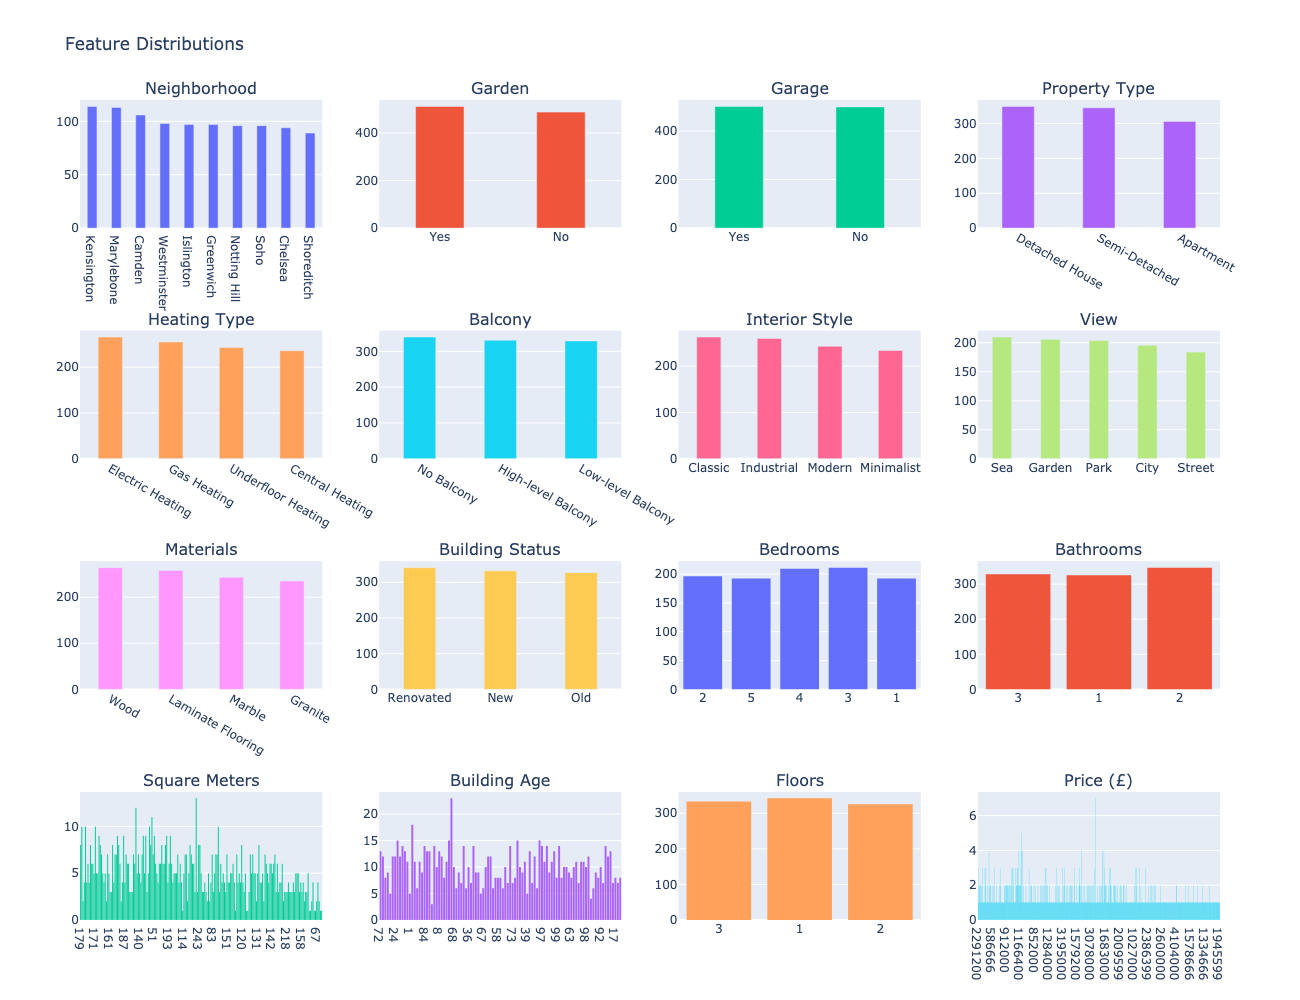

In [5]:
# Distribution of plot
london_data_copy = london_data.copy()
categorical_features = [col for col in london_data_copy.columns if london_data_copy[col].dtype == 'object' and col != 'Address']
numerical_features = [col for col in london_data_copy.columns if london_data_copy[col].dtype != 'object']

# Define subplot structure
num_features = len(categorical_features) + len(numerical_features)
cols = 4  
rows = (num_features // cols) + (num_features % cols > 0)  

fig = make_subplots(rows=rows, cols=cols, subplot_titles=categorical_features + numerical_features)

index = 0
for feature in categorical_features:
    # Subplot position
    row, col = divmod(index, cols)  
    counts = london_data_copy[feature].value_counts()
    
    fig.add_trace(go.Bar(x=counts.index, y=counts.values, name=feature, width=0.4), row=row+1, col=col+1)
    index += 1

for feature in numerical_features:
    row, col = divmod(index, cols)  # Determine subplot position
    
    # Convert integers to string to avoid decimals
    if london_data_copy[feature].dtype == "int64":
        x_data = london_data_copy[feature].astype(str) 
        xaxis_type = "category"
    else:
        x_data = london_data_copy[feature]
        xaxis_type = "linear"

    fig.add_trace(go.Histogram(x=x_data, name=feature), row=row+1, col=col+1)
    fig.update_xaxes(type=xaxis_type, row=row+1, col=col+1)
    index += 1

fig.update_layout(height=250 * rows, width=1300, title_text="Feature Distributions", showlegend=False)
fig.show()

# allow to display the plot in the notebook
pio.write_image(fig, "features_distributions.png") 
from IPython.display import Image
Image("features_distributions.png")

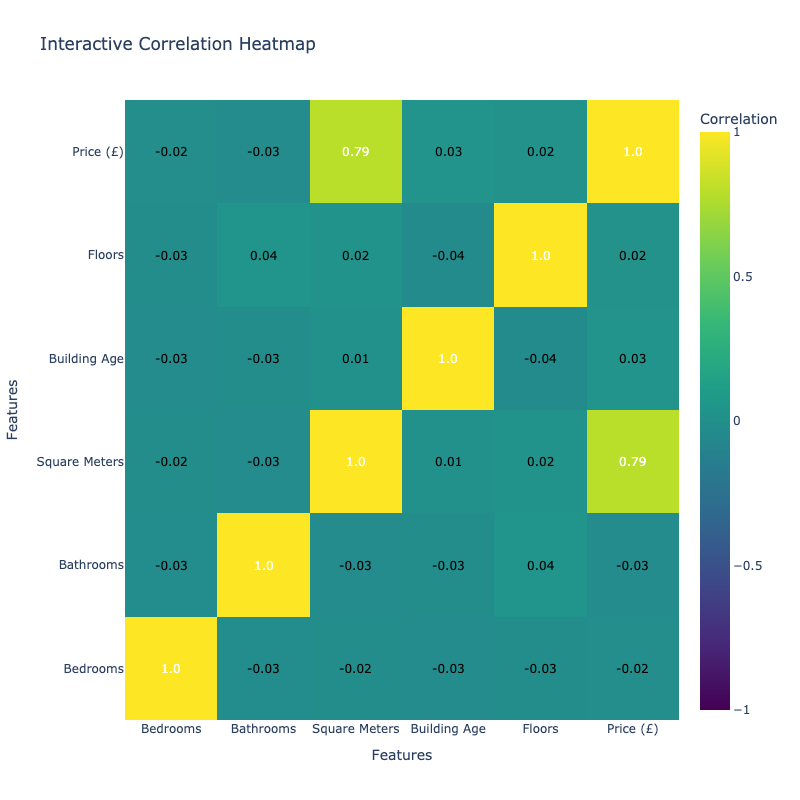

In [6]:
# Correlation heatmap
num_features = london_data_copy.select_dtypes(include=['float64', 'int64']).columns
df_corr = london_data_copy[num_features].corr()

fig = go.Figure(data=go.Heatmap(
    z=df_corr.values,
    x=df_corr.columns,
    y=df_corr.columns,
    colorscale='Viridis',  
    colorbar=dict(title="Correlation"),
    zmin=-1, zmax=1,
    text=df_corr.round(2).astype(str).values,  
    hoverinfo="text" ))


for i in range(len(df_corr)):
    for j in range(len(df_corr)):
        fig.add_annotation(
            x=df_corr.columns[j],
            y=df_corr.columns[i],
            text=str(round(df_corr.iloc[i, j], 2)), 
            showarrow=False,
            font=dict(
                color="black" if abs(df_corr.iloc[i, j]) < 0.5 else "white"  
            )
        )


fig.update_layout(title="Interactive Correlation Heatmap", xaxis_title="Features", yaxis_title="Features", xaxis_showgrid=False, yaxis_showgrid=False, width=800, height=800)
fig.show()


# allow to display the plot in the notebook
pio.write_image(fig, "correlation.png") 
from IPython.display import Image
Image("correlation.png")

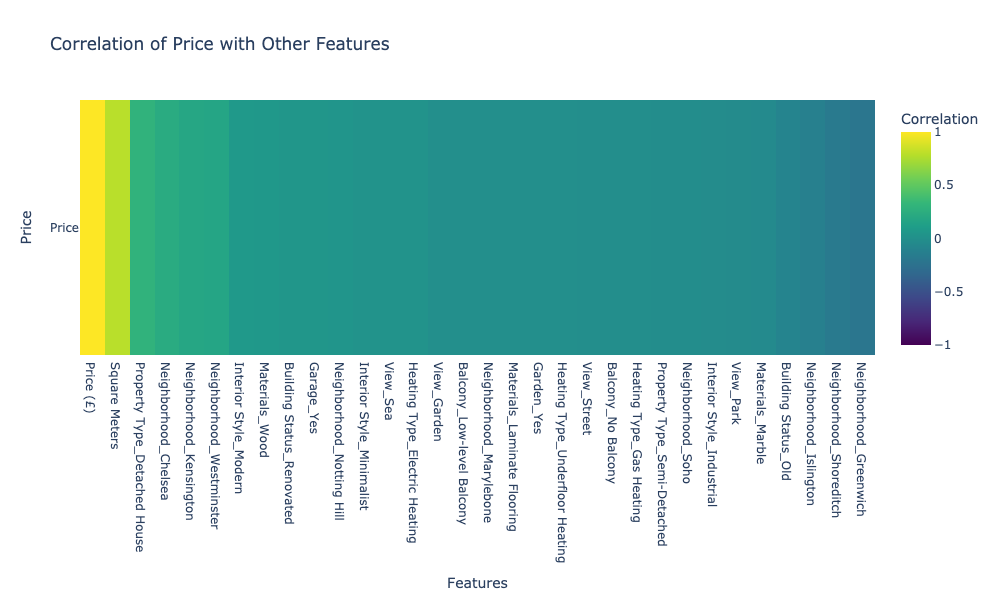

In [7]:
# One-hot encode categorical variables

london_copy = london_data.copy()
columns_to_drop = ['Bedrooms', 'Bathrooms', 'Building Age', 'Floors', 'Address']
london_copy.drop(columns=columns_to_drop, inplace=True)
london_data_encoded = pd.get_dummies(london_copy, drop_first=True)

df_corr = london_data_encoded.corr()
if 'Price (£)' in df_corr.columns:
    price_corr = df_corr[['Price (£)']].sort_values(by='Price (£)', ascending=False)
else:
    raise ValueError("Column 'Price' not found in the dataset.")


fig = go.Figure(data=go.Heatmap(
    z=price_corr.values.T, 
    x=price_corr.index,
    y=['Price'], 
    colorscale='Viridis',  
    colorbar=dict(title="Correlation"),
    zmin=-1, zmax=1,
     text=price_corr.round(2).astype(str).values.T,
    hoverinfo="text"
))

fig.update_layout(title="Correlation of Price with Other Features", xaxis_title="Features", yaxis_title="Price")

fig.show()

# allow to display the plot in the notebook
pio.write_image(fig, "correlation_price.png", width=1000, height=600) 
from IPython.display import Image
Image("correlation_price.png")